In [ ]:
###FECHAS POR CASOS TOTALES###

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import dateutil.parser
import datetime as dt
    
data = pd.read_csv("S:/Universidad/10mo/Simulacion/TrabajoCovidRegresion/Datos/fechaTotalCasos.csv")
data

date  total_cases
0    132020           60
1    232020           60
2    332020           70
3    432020          100
4    532020          130
..      ...          ...
399  442021      3356810
400  542021      3367770
401  642021      3377020
402  742021      3396040
403  842021      3416190

[404 rows x 2 columns]

In [3]:
# Tamanio dataset
data.shape

(404, 2)

In [4]:
# Informacion datases
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         404 non-null    int64
 1   total_cases  404 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [5]:
# Describiendo el dataset
data.describe()

date   total_cases
count  4.040000e+02  4.040000e+02
mean   4.861847e+06  1.361662e+06
std    7.405666e+06  9.931290e+05
min    1.120210e+05  6.000000e+01
25%    1.032021e+06  4.430925e+05
50%    2.017021e+06  1.248745e+06
75%    2.997020e+06  2.099000e+06
max    3.112202e+07  3.416190e+06

In [28]:
# Creando X & Y 
X = data['date']
y = data['total_cases']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 200)

In [7]:
X_train

396      142021
260    16112020
60      3042020
138     1772020
390     2632021
         ...   
298    24122020
324     1912021
272    28112020
105     1462020
282     8122020
Name: date, Length: 242, dtype: int64

In [8]:
y_train

396    3303880
260    1806760
60      249340
138     724440
390    3214510
        ...   
298    2080100
324    2325680
272    1909090
105     467510
282    1987520
Name: total_cases, Length: 242, dtype: int64

In [9]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_sm = sm.add_constant(X_train)

# Fitting de la línea de regresión usando 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.81
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           0.000417
Time:                        11:11:52   Log-Likelihood:                -3675.0
No. Observations:                 242   AIC:                             7354.
Df Residuals:                     240   BIC:                             7361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.171e+06   7.36e+04     15.910      0.000    1.03e+06    1.32e+06
date           0.0283      0.008      3.579      0.000       0.013       0.044
==============================================================================
Omnibus:                       21.700   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.578
Skew:                           0.650   Prob(JB):                     3.40e-05
Kurtosis:                       2.406   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#total_cases= 1.170000006 + 0.0283 * date

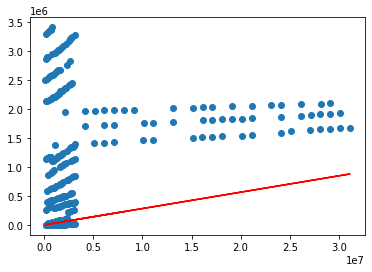

In [12]:
# Visualizando la linea de regresion
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.170000006 + 0.0283 * X_train, 'r')
plt.show()

In [13]:
# Prediciendo valor de y usando la data de entrenamiento de X
y_train_pred = lr.predict(X_train_sm)

# Creando reciduos del entreamiento de y_train y prediciendo y_data
res = (y_train - y_train_pred)

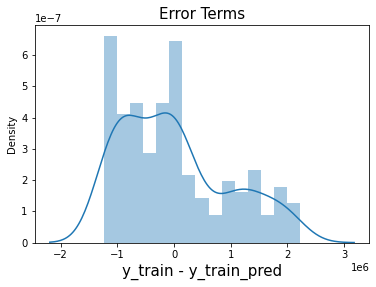

In [14]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

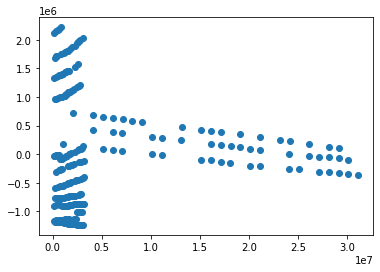

In [15]:
# Podemos ver patrones de nuestro res
plt.scatter(X_train,res)
plt.show()

In [16]:
# Anadiendo una constante a X_test
X_test_sm = sm.add_constant(X_test)

#  Prediciendo los valores de y que corresponden a X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Visualizando los 10 primeros valores predecidos
y_test_pred

311    1.188028e+06
269    1.881087e+06
16     1.219711e+06
382    1.222539e+06
92     1.175298e+06
           ...     
267    1.824511e+06
335    1.255919e+06
384    1.228197e+06
399    1.183219e+06
385    1.231026e+06
Length: 162, dtype: float64

In [17]:
from sklearn.metrics import r2_score

# Vizualisamos el valor de R-cuadrado
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.016258744784721002

In [18]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [63]:
#la ultima fecha tomada es del 08/04/2021 o en este caso 842021
plt.title('Total Casos por meses')
plt.plot(y)

In [64]:
#En el mes 1/03/2020 habian 60 casos
#En el mes 08/04/2021 habian 3,416.190 casos

date=np.zeros(153)
meses=4
dias=0
anios=2021
cont=-1

#Guardamos en un arreglo los dias de los proximos 5 meses

for i in range (0,5):
    meses=meses+1
    if((meses==5) or (meses==7) or (meses==8)):
        num_dias=31
    else:
        num_dias=30
        
    for j in range (1,num_dias+1):
        cont=cont+1
        dias=dias+1
        fecha=str(dias)+str(meses)+str(anios)
        date[cont]=int(fecha)
    dias=0
    
date

array([ 152021.,  252021.,  352021.,  452021.,  552021.,  652021.,
        752021.,  852021.,  952021., 1052021., 1152021., 1252021.,
       1352021., 1452021., 1552021., 1652021., 1752021., 1852021.,
       1952021., 2052021., 2152021., 2252021., 2352021., 2452021.,
       2552021., 2652021., 2752021., 2852021., 2952021., 3052021.,
       3152021.,  162021.,  262021.,  362021.,  462021.,  562021.,
        662021.,  762021.,  862021.,  962021., 1062021., 1162021.,
       1262021., 1362021., 1462021., 1562021., 1662021., 1762021.,
       1862021., 1962021., 2062021., 2162021., 2262021., 2362021.,
       2462021., 2562021., 2662021., 2762021., 2862021., 2962021.,
       3062021.,  172021.,  272021.,  372021.,  472021.,  572021.,
        672021.,  772021.,  872021.,  972021., 1072021., 1172021.,
       1272021., 1372021., 1472021., 1572021., 1672021., 1772021.,
       1872021., 1972021., 2072021., 2172021., 2272021., 2372021.,
       2472021., 2572021., 2672021., 2772021., 2872021., 29720

In [74]:
#Realizamos las predicciones de los proximos dias de los meses
#total_cases= 1.170000006 + 0.0283 * date

total_cases=np.zeros(153)

for i in range(0,153):
    total_cases[i] = (1.170000006 + 0.0283 * date[i])*100

total_cases

array([ 430336.4300006,  713336.4300006,  996336.4300006, 1279336.4300006,
       1562336.4300006, 1845336.4300006, 2128336.4300006, 2411336.4300006,
       2694336.4300006, 2977336.4300006, 3260336.4300006, 3543336.4300006,
       3826336.4300006, 4109336.4300006, 4392336.4300006, 4675336.4300006,
       4958336.4300006, 5241336.4300006, 5524336.4300006, 5807336.4300006,
       6090336.4300006, 6373336.4300006, 6656336.4300006, 6939336.4300006,
       7222336.4300006, 7505336.4300006, 7788336.4300006, 8071336.4300006,
       8354336.4300006, 8637336.4300006, 8920336.4300006,  458636.4300006,
        741636.4300006, 1024636.4300006, 1307636.4300006, 1590636.4300006,
       1873636.4300006, 2156636.4300006, 2439636.4300006, 2722636.4300006,
       3005636.4300006, 3288636.4300006, 3571636.4300006, 3854636.4300006,
       4137636.4300006, 4420636.4300006, 4703636.4300006, 4986636.4300006,
       5269636.4300006, 5552636.4300006, 5835636.4300006, 6118636.4300006,
       6401636.4300006, 6

In [186]:
#Prediccion de casos desde el 01/05/2021 hasta el 30/09/2021
plt.title('Total Casos en los proximos 5 meses')
plt.plot(total_cases,date)

In [ ]:
############################################################################################################################

In [ ]:
                                            ###FECHAS POR CASOS NUEVOS###

In [ ]:
############################################################################################################################

In [166]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import dateutil.parser
import datetime as dt
    
data2 = pd.read_csv("S:/Universidad/10mo/Simulacion/TrabajoCovidRegresion/Datos/fechaNuevosCasos.csv")
data2

date  new_cases
0    132020         60
1    232020          0
2    332020         10
3    432020         30
4    532020         30
..      ...        ...
399  442021      25060
400  542021      10960
401  642021       9250
402  742021      19020
403  842021      20150

[404 rows x 2 columns]

In [168]:
# Creando X & Y 
X2 = data2['date']
y2 = data2['new_cases']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size = 0.6, 
                                                    test_size = 0.4, random_state = 500)

In [169]:
X_train2

240    27102020
381     1732021
387     2332021
260    16112020
16      1732020
         ...   
287    13122020
206     2392020
273    29112020
321     1612021
346     1022021
Name: date, Length: 242, dtype: int64

In [170]:
y_train2

240    10140
381    27440
387     7190
260     3810
16       210
       ...  
287     5860
206    22490
273    12080
321    39420
346     2930
Name: new_cases, Length: 242, dtype: int64

In [171]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_sm2 = sm.add_constant(X_train2)

# Fitting de la línea de regresión usando 'OLS'
lr2 = sm.OLS(y_train2, X_train_sm2).fit()
lr2.params

const    7666.242698
date        0.000083
dtype: float64

In [172]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.262
Date:                Mon, 12 Apr 2021   Prob (F-statistic):              0.262
Time:                        12:24:53   Log-Likelihood:                -2544.0
No. Observations:                 242   AIC:                             5092.
Df Residuals:                     240   BIC:                             5099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7666.2427    679.519     11.282      0.000    6327.660    9004.826
date        8.252e-05   7.35e-05      1.123      0.262   -6.22e-05       0.000
==============================================================================
Omnibus:                      230.484   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14482.157
Skew:                          -3.343   Prob(JB):                         0.00
Kurtosis:                      40.303   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
#total_cases= 7666.242698 + 0.000083 * date

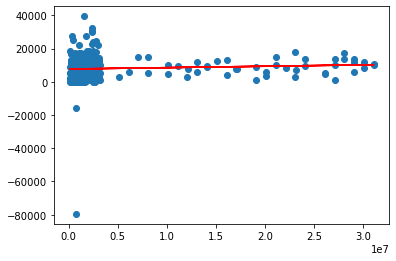

In [173]:
# Visualizando la linea de regresion
plt.scatter(X_train2, y_train2)
plt.plot(X_train2, 7666.242698 + 0.000083 * X_train2, 'r')
plt.show()

In [175]:
# Prediciendo valor de y usando la data de entrenamiento de X
y_train_pred2 = lr2.predict(X_train_sm2)

# Creando reciduos del entreamiento de y_train y prediciendo y_data
res2 = (y_train2 - y_train_pred2)

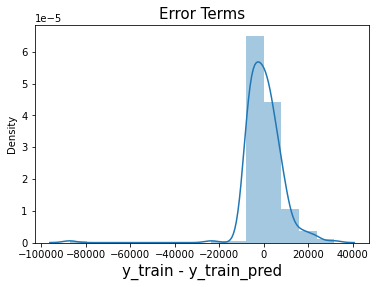

In [176]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res2, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

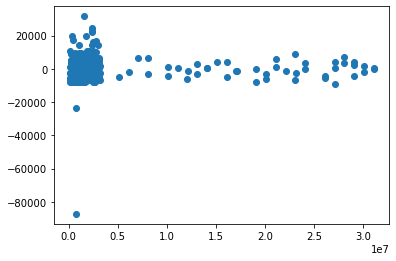

In [177]:
# Podemos ver patrones de nuestro res
plt.scatter(X_train2,res2)
plt.show()

In [178]:
# Anadiendo una constante a X_test
X_test_sm2 = sm.add_constant(X_test2)

#  Prediciendo los valores de y que corresponden a X_test_sm
y_test_pred2 = lr.predict(X_test_sm2)

# Visualizando los 10 primeros valores predecidos
y_test_pred2

133    7771.209532
217    8004.740562
325    7832.274266
345    7742.327685
334    7906.542084
          ...     
135    7787.713492
25     7883.436458
268    9655.961732
302    9986.866125
126    7713.445673
Length: 162, dtype: float64

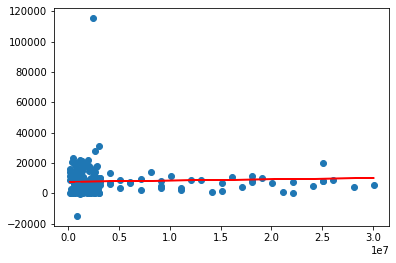

In [179]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_test2, y_test2)
plt.plot(X_test2, y_test_pred2, 'r')
plt.show()

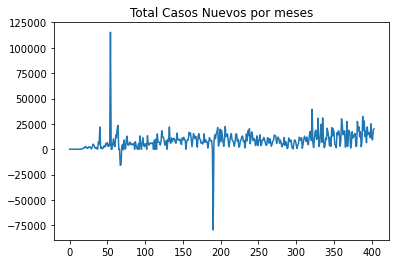

In [180]:
#la ultima fecha tomada es del 08/04/2021 o en este caso 842021
plt.title('Total Casos Nuevos por meses')
plt.plot(y2)

In [181]:
#En el mes 08/04/2021 habian 3,416.190 casos

date2=np.zeros(153)
meses=4
dias=0
anios=2021
cont=-1

#Guardamos en un arreglo los dias de los proximos 5 meses

for i in range (0,5):
    meses=meses+1
    if((meses==5) or (meses==7) or (meses==8)):
        num_dias=31
    else:
        num_dias=30
        
    for j in range (1,num_dias+1):
        cont=cont+1
        dias=dias+1
        fecha=str(dias)+str(meses)+str(anios)
        date2[cont]=int(fecha)
    dias=0

In [183]:
#Realizamos las predicciones de los proximos dias de los meses
#new_cases= 7666.242698 + 0.000083 * date

new_cases=np.zeros(153)

for i in range(0,153):
    new_cases[i] = (7666.242698 + 0.000083 * date2[i])

new_cases

array([7678.860441, 7687.160441, 7695.460441, 7703.760441, 7712.060441,
       7720.360441, 7728.660441, 7736.960441, 7745.260441, 7753.560441,
       7761.860441, 7770.160441, 7778.460441, 7786.760441, 7795.060441,
       7803.360441, 7811.660441, 7819.960441, 7828.260441, 7836.560441,
       7844.860441, 7853.160441, 7861.460441, 7869.760441, 7878.060441,
       7886.360441, 7894.660441, 7902.960441, 7911.260441, 7919.560441,
       7927.860441, 7679.690441, 7687.990441, 7696.290441, 7704.590441,
       7712.890441, 7721.190441, 7729.490441, 7737.790441, 7746.090441,
       7754.390441, 7762.690441, 7770.990441, 7779.290441, 7787.590441,
       7795.890441, 7804.190441, 7812.490441, 7820.790441, 7829.090441,
       7837.390441, 7845.690441, 7853.990441, 7862.290441, 7870.590441,
       7878.890441, 7887.190441, 7895.490441, 7903.790441, 7912.090441,
       7920.390441, 7680.520441, 7688.820441, 7697.120441, 7705.420441,
       7713.720441, 7722.020441, 7730.320441, 7738.620441, 7746.

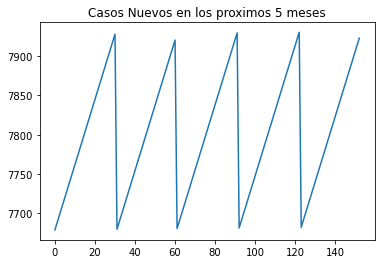

In [189]:
#Prediccion de casos desde el 01/05/2021 hasta el 30/09/2021
plt.title('Casos Nuevos en los proximos 5 meses')
plt.plot(new_cases)